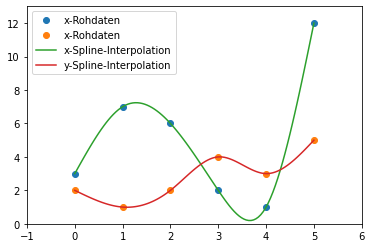

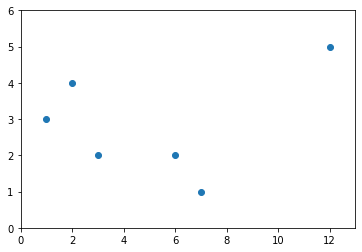

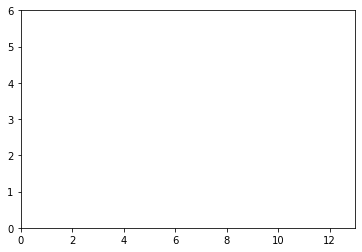

In [2]:
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

# Definiere eine Funktion zur Berechnung von kubischen Splines
def cubic_spline(xraw, yraw):
    n = len(xraw)
    h = np.diff(xraw)
    alpha = np.zeros(n-1)
    for i in range(1, n-1):
        alpha[i] = 3/h[i]*(yraw[i+1]-yraw[i]) - 3/h[i-1]*(yraw[i]-yraw[i-1])
    
    l = np.zeros(n)
    mu = np.zeros(n)
    z = np.zeros(n)
    l[0] = 1
    mu[0] = z[0] = 0
    
    for i in range(1, n-1):
        l[i] = 2*(xraw[i+1]-xraw[i-1])-h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i]-h[i-1]*z[i-1])/l[i]
    
    l[n-1] = 1
    z[n-1] = 0
    c = np.zeros(n)
    b = np.zeros(n-1)
    d = np.zeros(n-1)
    
    xcs = np.linspace(xraw[0], xraw[-1], 100)  # create 100 points on x to calculate cubic spline y values
    for j in range(n-2, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (yraw[j+1]-yraw[j])/h[j] - h[j]*(c[j+1]+2*c[j])/3
        d[j] = (c[j+1]-c[j])/(3*h[j])
        
    ycs = np.zeros(len(xcs))    
    for i in range(len(xcs)):
        for j in range(len(xraw)-1):
            if xraw[j] <= xcs[i] <= xraw[j+1]:
                ycs[i] = yraw[j] + b[j]*(xcs[i]-t[j]) + c[j]*(xcs[i]-t[j])**2 + d[j]*(xcs[i]-t[j])**3
                break
    
    return xcs, ycs


# Input der Rohdaten
t = np.array([0, 1, 2, 3, 4, 5])
x = np.array([3, 7, 6, 2, 1, 12])
y = np.array([2, 1, 2, 4, 3, 5])


# Splineinterpolation mit der erstellten Funktion berechnen
t_new, x_new = cubic_spline(t, x)
t_new, y_new = cubic_spline(t, y)


# Rohdaten und Interpolation graphisch darstellen
fig, ax = plt.subplots()
ax.set_xlim([t[0]-1, t[len(t)-1]+1])
ax.set_ylim([min(min(x)-1,min(y)-1), max(max(x)+1,max(y)+1)])

ax.plot(t, x, 'o', label='x-Rohdaten')
ax.plot(t, y, 'o', label='x-Rohdaten')
ax.plot(t_new, x_new, label='x-Spline-Interpolation')
ax.plot(t_new, y_new, label='y-Spline-Interpolation')
ax.legend()
plt.show()



fig3, ax = plt.subplots()
ax.set_xlim([min(x)-1, max(x)+1])
ax.set_ylim([min(y)-1, max(y)+1])

ax.plot(x, y, 'o', label='koordinaten')


plt.show()


# Zeitliche Animation der Rohdaten und der Interpolation
fig2, ax = plt.subplots()
ax.set_xlim([min(x)-1, max(x)+1])
ax.set_ylim([min(y)-1, max(y)+1])

# Plotten der Punkte
points, = ax.plot([], [], 'bo')

# Update-Funktion für die Animation
def update(i):
    # Setzen der neuen Daten für die Punkte
    points.set_data(x[:i+1], y[:i+1])
    
    # Rückgabe des geänderten Punkte-Objekts
    return points,

# Erstellung der Animation
animation = FuncAnimation(fig2, update, frames=len(t), interval=500, repeat=False)

# Anzeigen der Animation
plt.show()

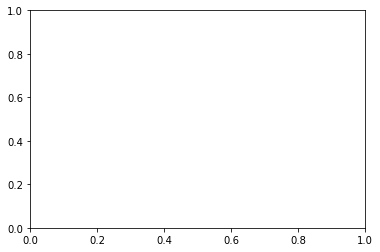

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Funktion, die den Wert der Ortsfunktion für einen bestimmten Zeitpunkt und Ort zurückgibt
def z(x, y, t):
    return np.sin(np.sqrt(x**2 + y**2 + t))

# Erstelle ein Raster von Koordinaten
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Erstelle eine Figur und eine Achse für die Animation
fig = plt.figure()
ax = fig.add_subplot(111)

# Funktion zur Aktualisierung der Animation
def updatefig(t):
    # Lösche den vorherigen Plot
    ax.clear()
    # Berechne die Werte der Ortsfunktion für den aktuellen Zeitpunkt
    Z = z(X, Y, t)
    # Zeichne die Oberfläche
    ax.plot_surface(X, Y, Z, cmap='coolwarm')
    # Setze die Achsenlimits
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-1.5, 1.5)
    # Setze den Titel
    ax.set_title('t = {:.2f}'.format(t))

# Erstelle die Animation
ani = animation.FuncAnimation(fig, updatefig, frames=np.linspace(0, 10, 100), interval=50)

# Zeige die Animation
plt.show()